In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler

In [2]:
model = joblib.load('data/capstone/xgb_model.pkl')
model

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=2500, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [17]:
df_2018 = pd.read_csv('data/capstone/NFL2018.csv')
df_2018.sample(10)

,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,...,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining,field_goal_range,red_zone,play_type,predictions,correct_pred
28834,2018-12-16,2018121606,WAS,JAX,0,0,26.0,14,544.0,3,...,-6.0,1,0,3.0,3.0,1,0,1,1,1
1590,2018-09-09,2018090909,WAS,ARI,0,0,49.0,5,526.0,2,...,7.0,1,0,2.0,3.0,0,0,1,1,1
24596,2018-12-02,2018120202,LAR,DET,0,0,47.0,7,353.0,2,...,0.0,0,0,2.0,3.0,0,0,0,0,1
20878,2018-11-18,2018111806,WAS,HOU,0,1,13.0,16,333.0,3,...,-9.0,1,0,3.0,3.0,1,1,0,1,0
949,2018-09-09,2018090902,CIN,IND,0,0,3.0,9,114.0,2,...,-10.0,0,0,2.0,3.0,1,1,1,0,0
16435,2018-11-04,2018110409,NO,LAR,0,1,22.0,3,147.0,1,...,0.0,0,0,3.0,3.0,1,0,1,1,1
21941,2018-11-22,2018112201,WAS,DAL,1,0,57.0,6,591.0,2,...,-7.0,1,0,2.0,3.0,0,0,1,1,1
4557,2018-09-23,2018092308,IND,PHI,1,0,54.0,22,5.0,4,...,-4.0,1,0,0.0,0.0,0,0,1,1,1
4586,2018-09-23,2018092307,BUF,MIN,1,0,54.0,7,79.0,1,...,17.0,1,0,3.0,3.0,0,0,1,1,1
17790,2018-11-11,2018111104,IND,JAX,0,1,2.0,5,2.0,1,...,0.0,0,0,3.0,3.0,1,1,0,1,0


In [18]:
df_2019 = pd.read_csv('data/capstone/NFL2019.csv')
df_2019.sample(10)

,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,...,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining,field_goal_range,red_zone,play_type,predictions,correct_pred
30848,2019-12-29,2019122912,ATL,TB,0,0,13.0,3,504.0,1,...,7.0,1,0,3.0,3.0,1,1,1,1,1
2249,2019-09-15,2019091509,WAS,DAL,1,1,64.0,7,728.0,2,...,7.0,0,0,2.0,3.0,0,0,0,0,1
9286,2019-10-06,2019100610,DEN,LAC,1,0,96.0,14,259.0,3,...,17.0,0,0,2.0,3.0,0,0,0,0,1
18953,2019-11-17,2019111704,MIA,BUF,1,1,75.0,8,461.0,2,...,-16.0,1,0,3.0,2.0,0,0,1,1,1
34,2019-09-05,2019090500,CHI,GB,0,1,39.0,8,696.0,2,...,-4.0,0,0,2.0,3.0,0,0,0,0,1
15953,2019-11-03,2019110301,BUF,WAS,0,1,29.0,17,310.0,4,...,8.0,0,0,3.0,2.0,1,0,0,0,1
16725,2019-11-07,2019110700,LAC,OAK,0,0,45.0,1,773.0,1,...,0.0,0,0,3.0,3.0,0,0,0,0,1
6198,2019-09-29,2019092900,TEN,ATL,0,0,40.0,21,223.0,4,...,14.0,0,0,2.0,2.0,0,0,0,0,1
22990,2019-12-01,2019120110,PIT,CLE,0,1,46.0,12,289.0,3,...,7.0,1,0,3.0,3.0,0,0,0,1,0
10850,2019-10-13,2019101307,ARI,ATL,1,1,66.0,2,439.0,1,...,-7.0,1,0,3.0,2.0,0,0,1,1,1


In [35]:
## Check the distribution of our data

freq1 = df_2018['play_type'].mean()
freq2 = df_2019['play_type'].mean()
print(f'Passing frequency in the 2018 season was {freq1}')
print(f'Passing frequency in the 2019 season was {freq2}')

Passing frequency in the 2018 season was 0.5935932203389831
Passing frequency in the 2019 season was 0.5936200156372166


Somewhat suprising the distribution between these 2 seasons were extremely consistent with passing occuring 59.36% vs 40.64% running plays

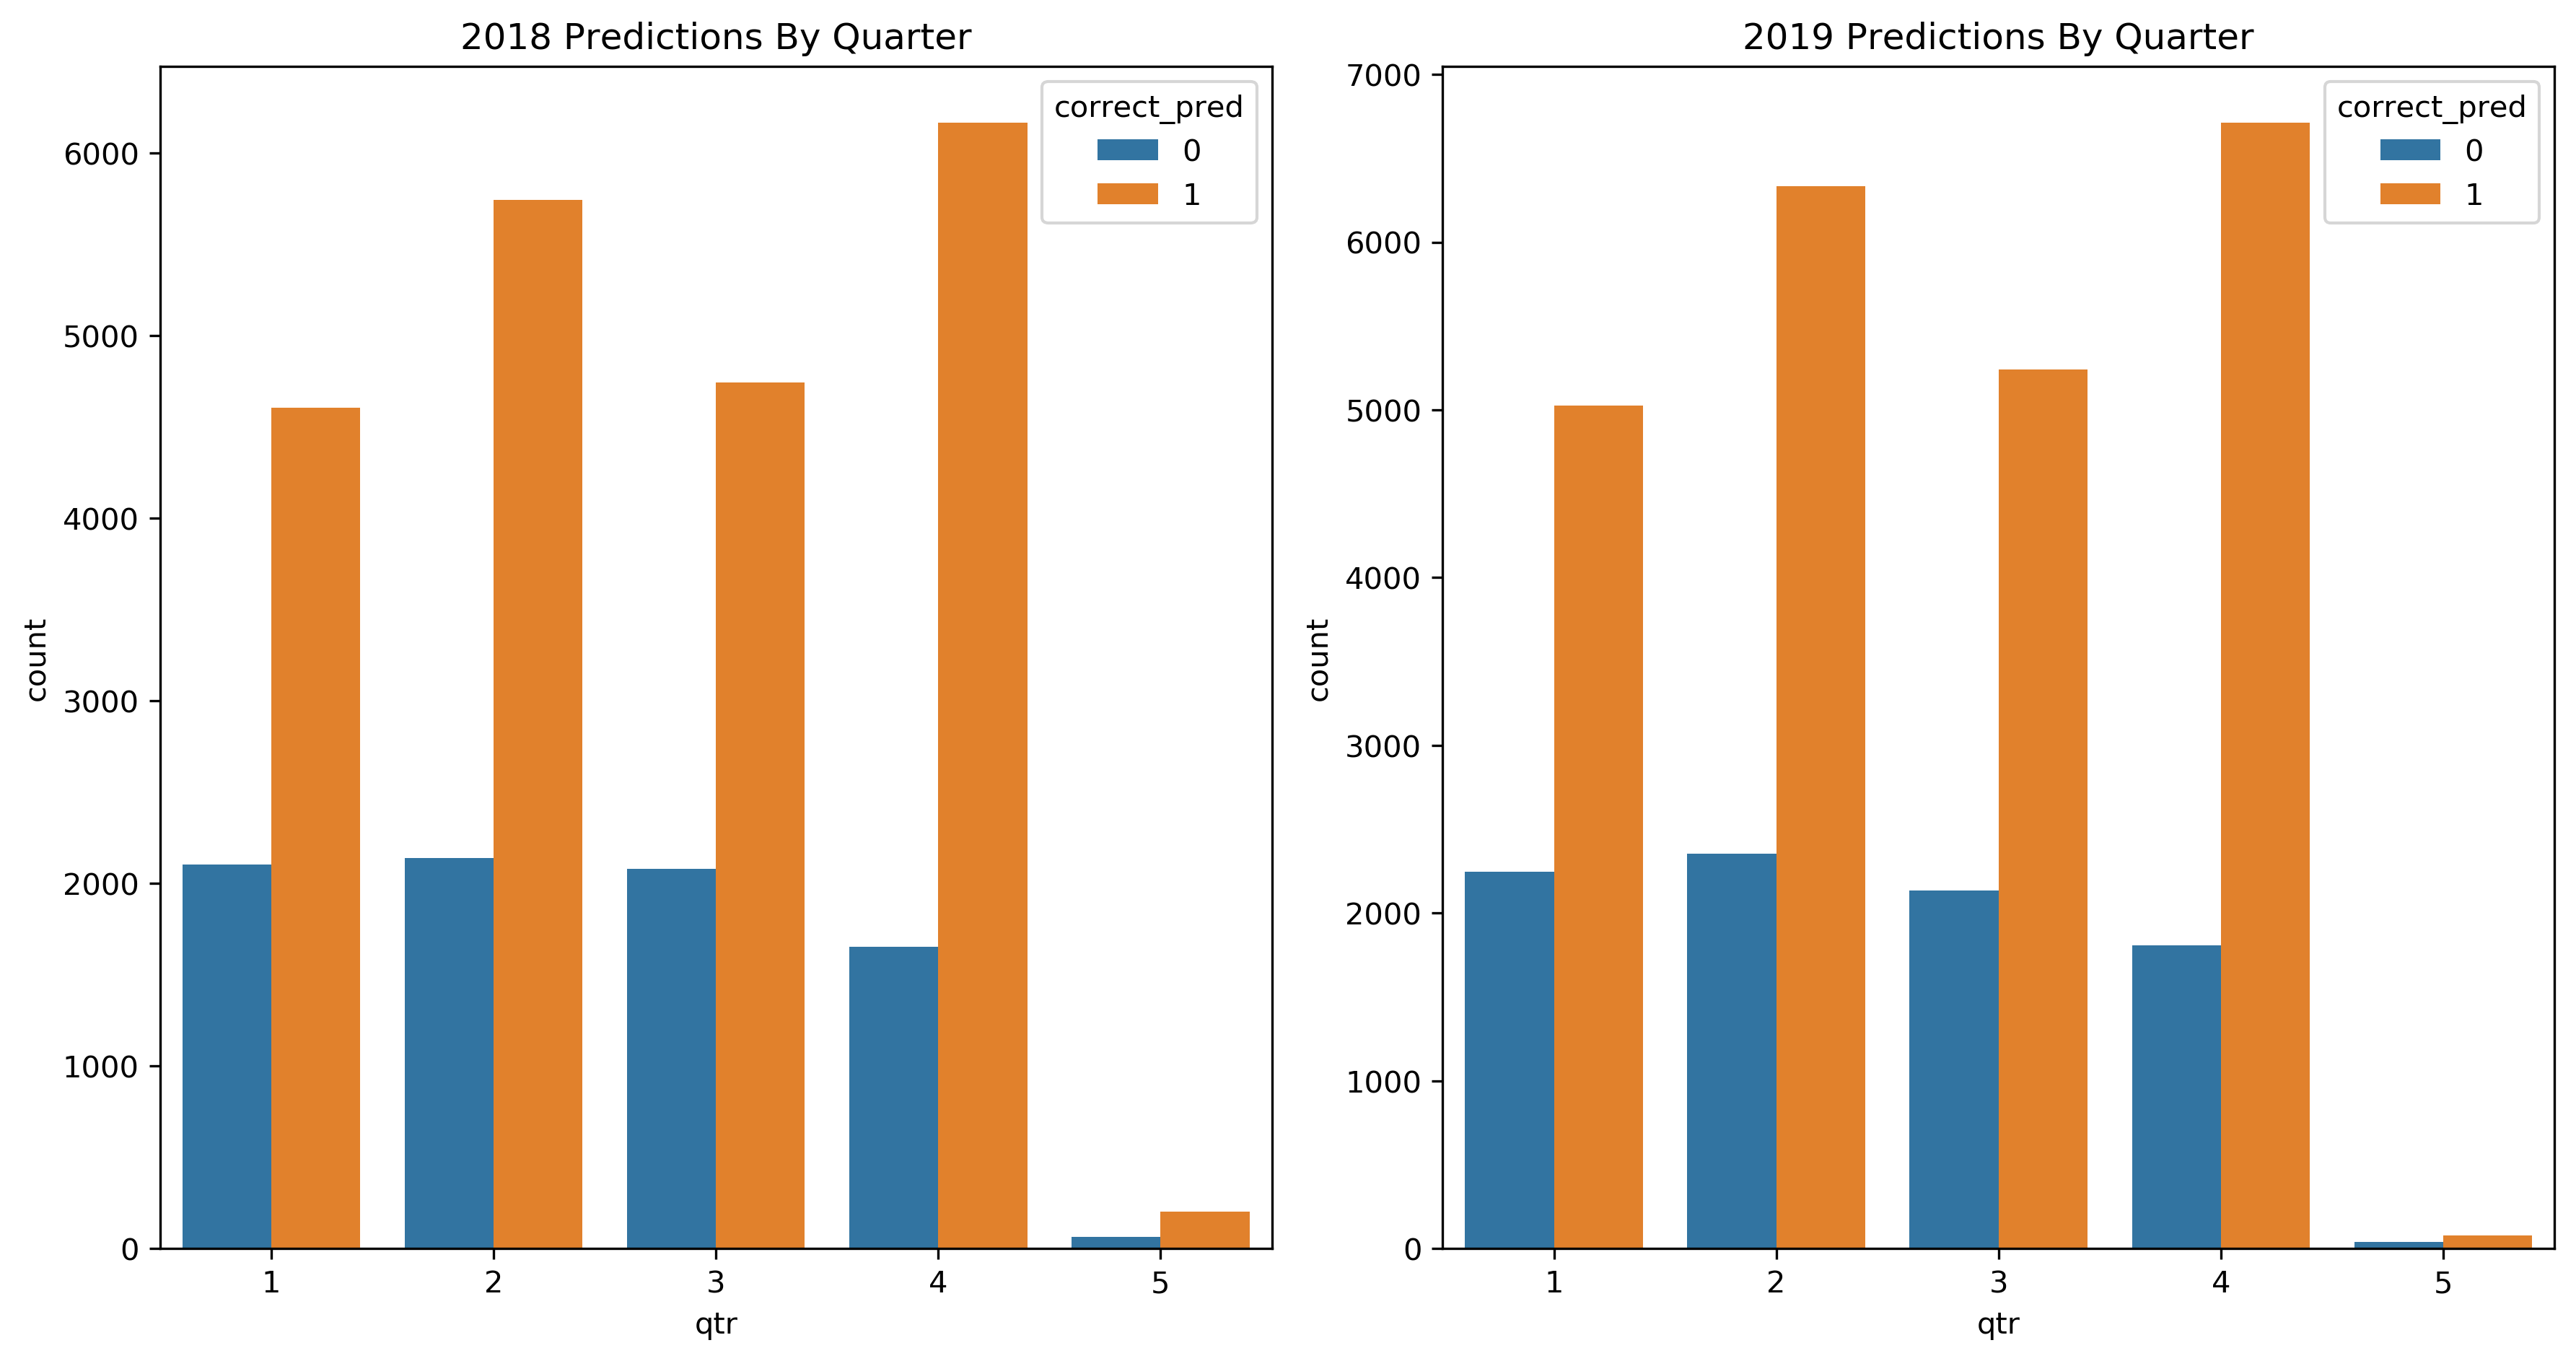

2018 Accuracy by qtr
1    0.686447
2    0.728472
3    0.695295
4    0.788518
5    0.765152
Name: correct_pred, dtype: float64
2019 Accuracy by qtr
1    0.690869
2    0.729219
3    0.710491
4    0.787701
5    0.677966
Name: correct_pred, dtype: float64


In [266]:
## Plot the 2018 predictions by Quarter

df_qtr_2018 = df_2018.groupby(['qtr']).correct_pred.value_counts()

df_qtr_2018 = pd.DataFrame(df_qtr_2018)
df_qtr_2018.rename(columns={'correct_pred' : 'count'}, inplace=True)
df_qtr_2018.reset_index(inplace=True)

## plot the 2019 prediction by Quarter

df_qtr_2019 = df_2019.groupby(['qtr']).correct_pred.value_counts()

df_qtr_2019 = pd.DataFrame(df_qtr_2019)
df_qtr_2019.rename(columns={'correct_pred' : 'count'}, inplace=True)
df_qtr_2019.reset_index(inplace=True)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('2018 Predictions By Quarter')
qtr_2018 = sns.barplot(x='qtr', y= 'count', data=df_qtr_2018, hue='correct_pred')

plt.subplot(2,2,2)
plt.title('2019 Predictions By Quarter')
sns.barplot(x='qtr', y= 'count', data=df_qtr_2019, hue='correct_pred')


plt.tight_layout()
plt.show()

print('2018 Accuracy by', df_2018.groupby(['qtr']).correct_pred.mean())
print('2019 Accuracy by', df_2019.groupby(['qtr']).correct_pred.mean())

Fairly consistent results accros the quarters. 5th quarter indicates overtime which is relatively rare in the NFL.

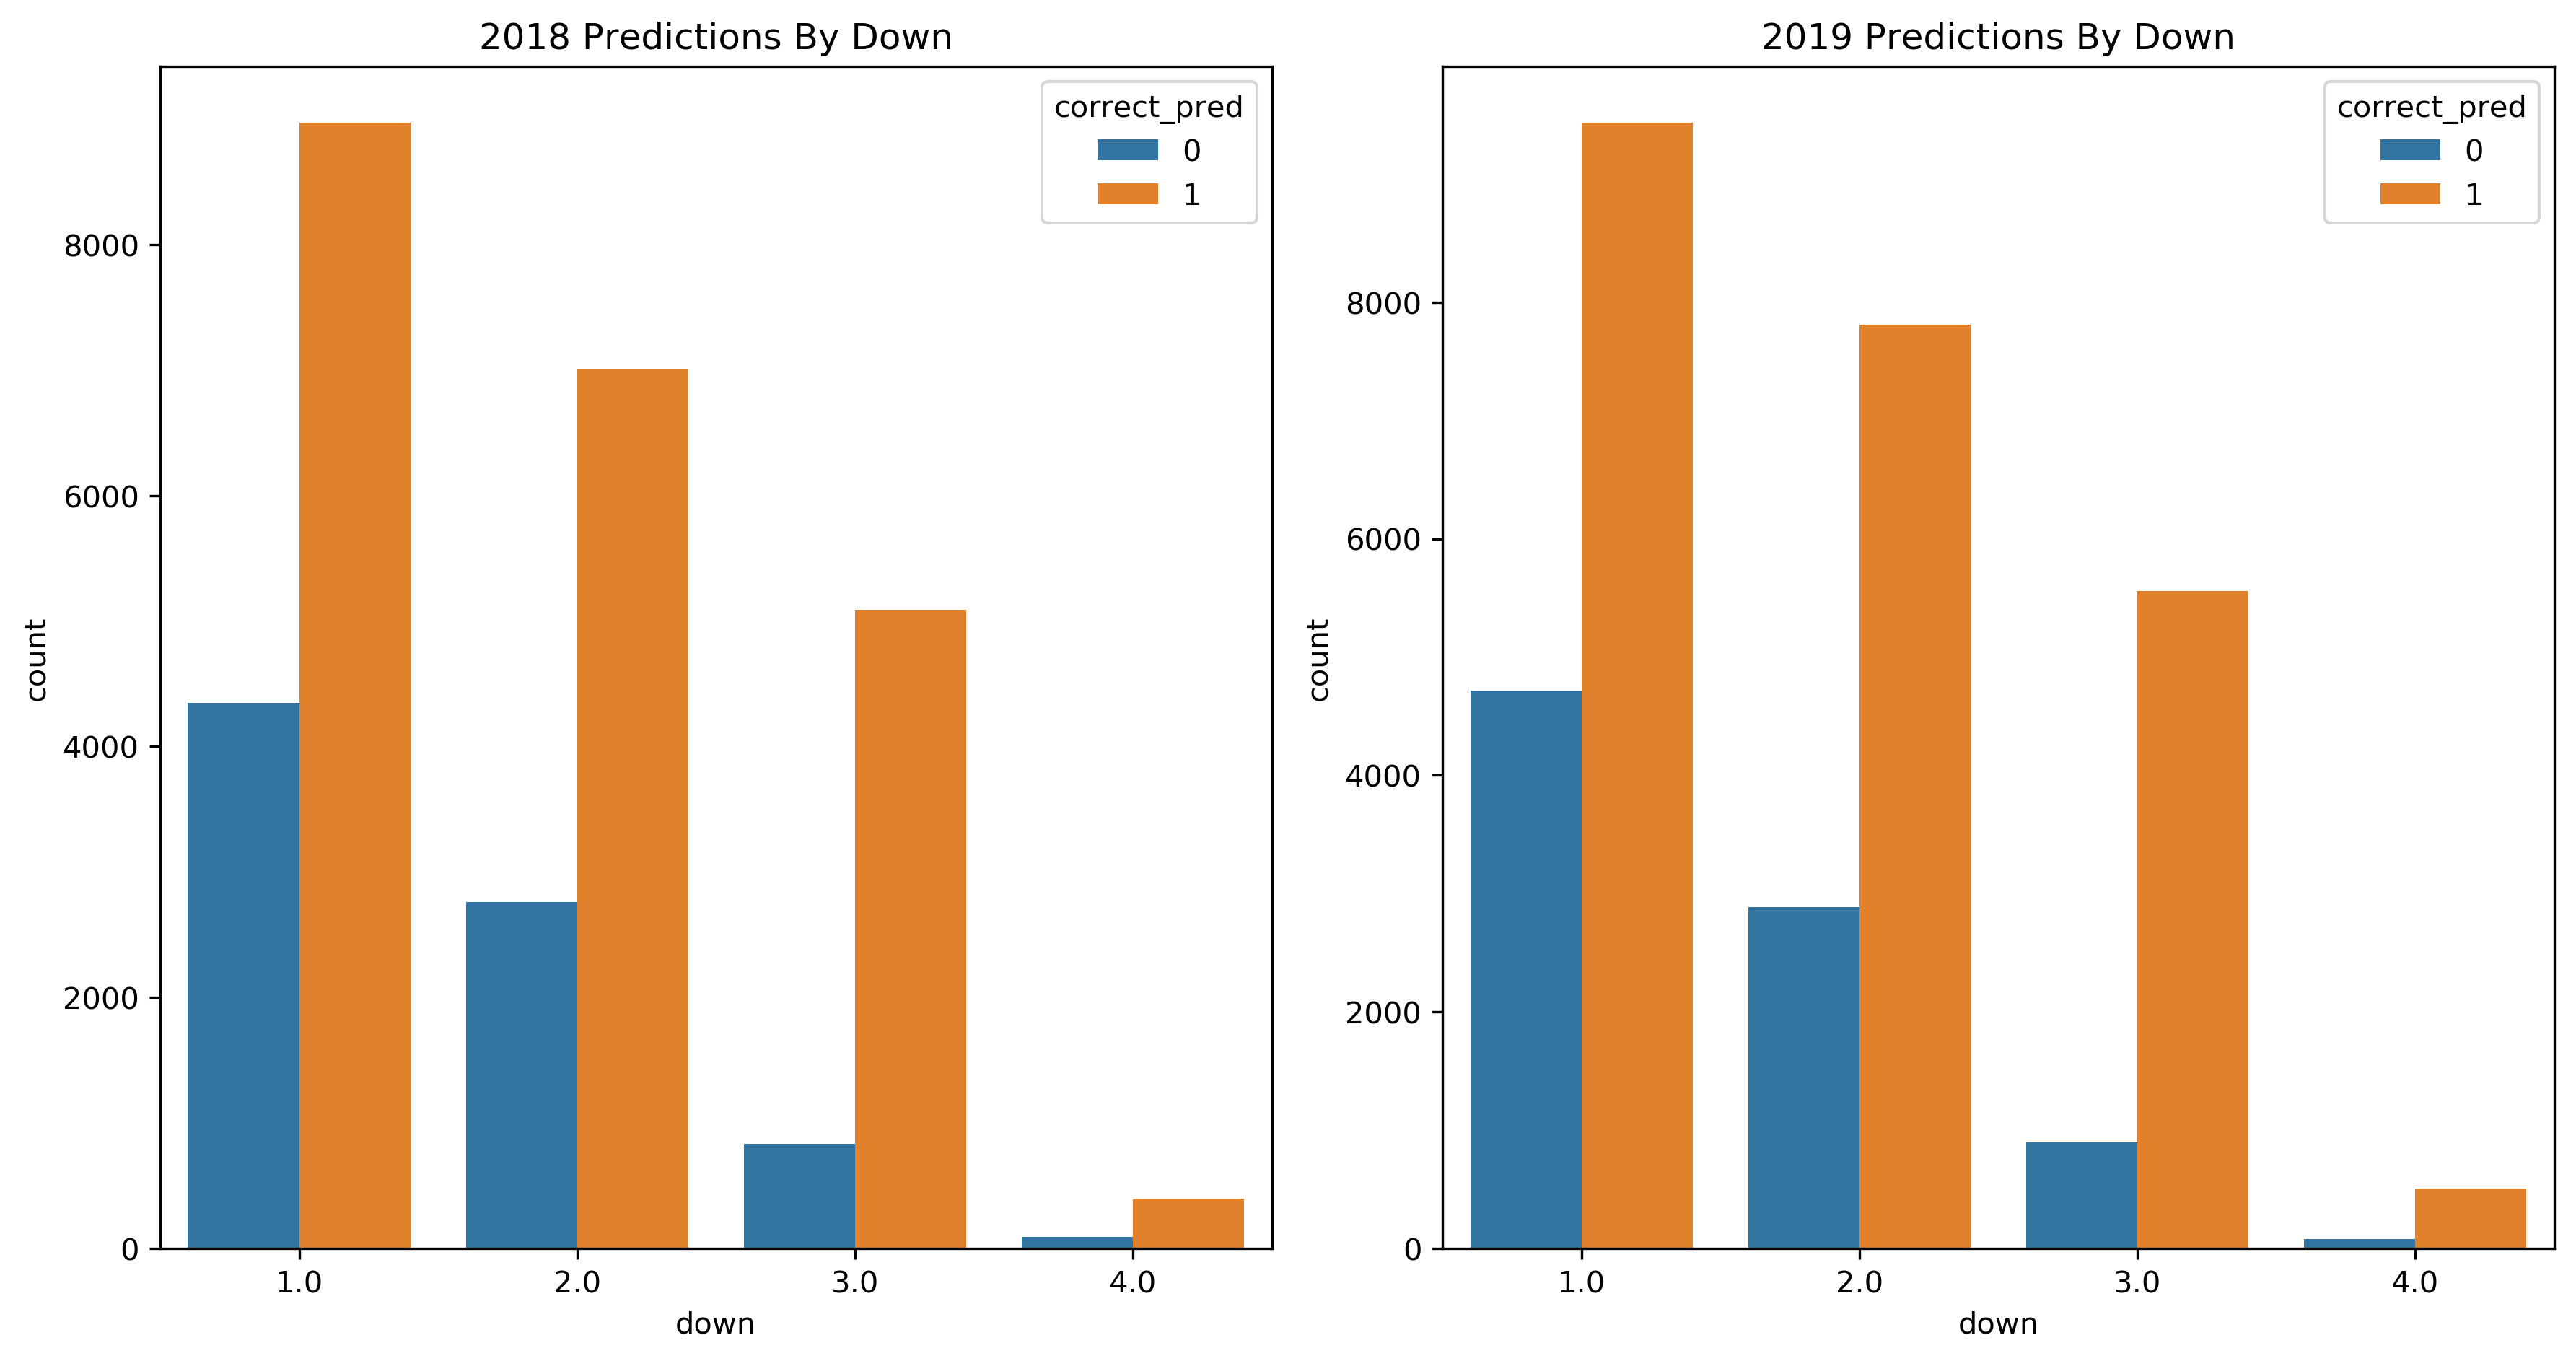

2018 Accuracy by down
1.0    0.673474
2.0    0.717313
3.0    0.859024
4.0    0.808554
Name: correct_pred, dtype: float64
2019 Accuracy by down
1.0    0.668728
2.0    0.729950
3.0    0.860814
4.0    0.862245
Name: correct_pred, dtype: float64


In [267]:
## Plot the 2018 predictions by Down

df_down_2018 = df_2018.groupby(['down']).correct_pred.value_counts()

df_down_2018 = pd.DataFrame(df_down_2018)
df_down_2018.rename(columns={'correct_pred' : 'count'}, inplace=True)
df_down_2018.reset_index(inplace=True)

## plot the 2019 prediction by Down

df_down_2019 = df_2019.groupby(['down']).correct_pred.value_counts()

df_down_2019 = pd.DataFrame(df_down_2019)
df_down_2019.rename(columns={'correct_pred' : 'count'}, inplace=True)
df_down_2019.reset_index(inplace=True)

## Create subplot of both years predicted

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('2018 Predictions By Down')
sns.barplot(x='down', y= 'count', data=df_down_2018, hue='correct_pred')

plt.subplot(2,2,2)
plt.title('2019 Predictions By Down')
sns.barplot(x='down', y= 'count', data=df_down_2019, hue='correct_pred')

# plt.subplot(2,2,3)
# plt.title('2019 Predictions By Down')
# sns.barplot(x='down', y= 'count', data=df_down_2019, hue='correct_pred')

# plt.subplot(2,2,4)
# plt.title('2019 Predictions By Down')
# sns.barplot(x='down', y= 'count', data=df_down_2019, hue='correct_pred')


plt.tight_layout()
plt.show()

print('2018 Accuracy by', df_2018.groupby(['down']).correct_pred.mean())
print('2019 Accuracy by', df_2019.groupby(['down']).correct_pred.mean())

The model seems to be pretty good at predicting third down situations in relation to other downs. This is likely due to the distribution of passes is much higher than runs on third down situations.

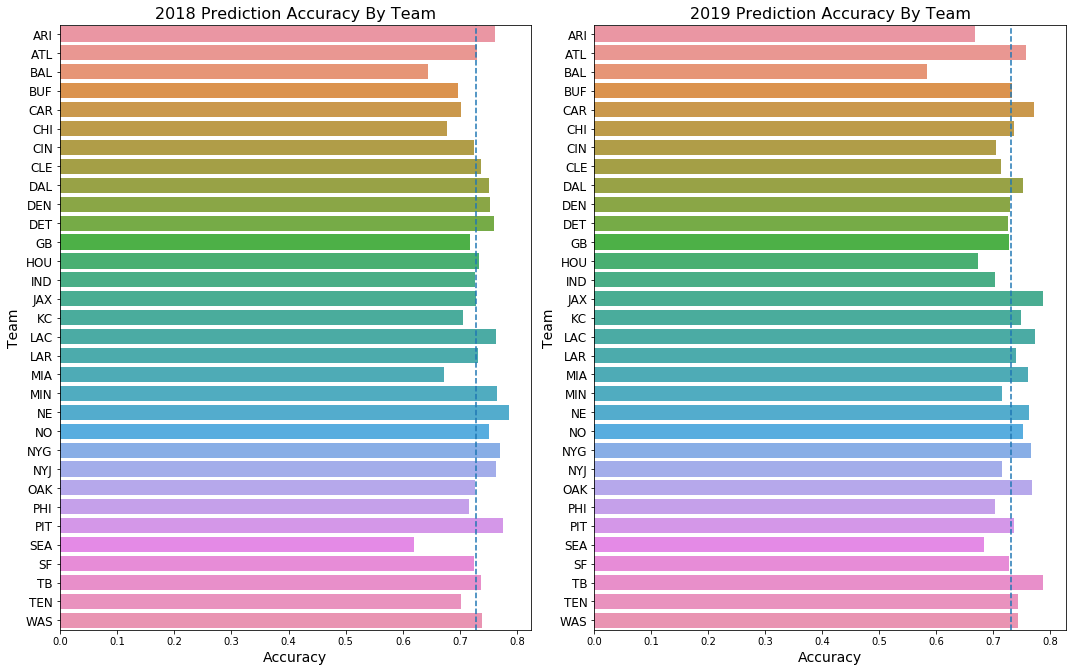

In [323]:
df_team_2018 = df_2018.groupby(['posteam']).correct_pred.mean()
accuracy_2018 = df_2018['correct_pred'].mean()
df_team_2018 = pd.DataFrame(df_team_2018)
df_team_2018.reset_index(inplace=True)
#df_team_2018 = df_team_2018.sort_values('correct_pred', ascending=False)

df_team_2019 = df_2019.groupby(['posteam']).correct_pred.mean()
accuracy_2019 = df_2019['correct_pred'].mean()
df_team_2019 = pd.DataFrame(df_team_2019)
df_team_2019.reset_index(inplace=True)
#df_team_2019 = df_team_2019.sort_values('correct_pred', ascending=False)


plt.figure(figsize=(15,18))
plt.subplot(2,2,1)
plt.title('2018 Prediction Accuracy By Team', fontsize=16)
plt.xlabel('accuracy', fontsize=14)
plt.ylabel('team', fontsize=14)
plt.yticks(fontsize=12)
ax1 = sns.barplot(x='correct_pred', y= 'posteam', data=df_team_2018)
ax1.set_xlabel('Accuracy')
ax1.set_ylabel('Team')
ax1.axvline(accuracy_2018, ls='--')


plt.subplot(2,2,2)
plt.title('2019 Prediction Accuracy By Team', fontsize=16)
plt.xlabel('accuracy', fontsize=14)
plt.ylabel('team', fontsize=14)
plt.yticks(fontsize=12)
ax2 = sns.barplot(x='correct_pred', y= 'posteam', data=df_team_2019)
ax2.set_xlabel('Accuracy')
ax2.set_ylabel('Team')
ax2.axvline(accuracy_2019, ls='--')

plt.tight_layout()
plt.show()

In [329]:
df_ne_sea_2018 = df_team_2018.rename(columns={'posteam': 'Team', 'correct_pred': 'Prediction Accuracy'})
df_ne_sea_2018.sort_values('Prediction Accuracy', ascending=False).iloc[[0,-1]].round(3)


,Team,Prediction Accuracy
20,NE,0.785
27,SEA,0.620


Very interesting to see in 2018 the New England Patriots were the most "predictible" team in the NFL and they eneded up winning the superbowl. While in 2019 the most predictable team was the Tampa Bay Buccaneers who were a below average team.

In [272]:
feat_names = df_2018.columns[4:18]
feat_importance = model.feature_importances_

feat_dict = {'Feature Names' : feat_names,
             'Feature Importance': feat_importance}
df_features = pd.DataFrame(feat_dict, columns=['Feature Names', 'Feature Importance' ])
df_features.sort_values(by=['Feature Importance'], ascending=False)

,Feature Names,Feature Importance
9,shotgun,0.746916
6,down,0.067203
7,ydstogo,0.039621
5,qtr,0.036876
8,score_differential,0.017726
11,posteam_timeouts_remaining,0.013527
13,field_goal_range,0.013219
12,defteam_timeouts_remaining,0.011944
4,quarter_seconds_remaining,0.011933
2,yardline_100,0.009798


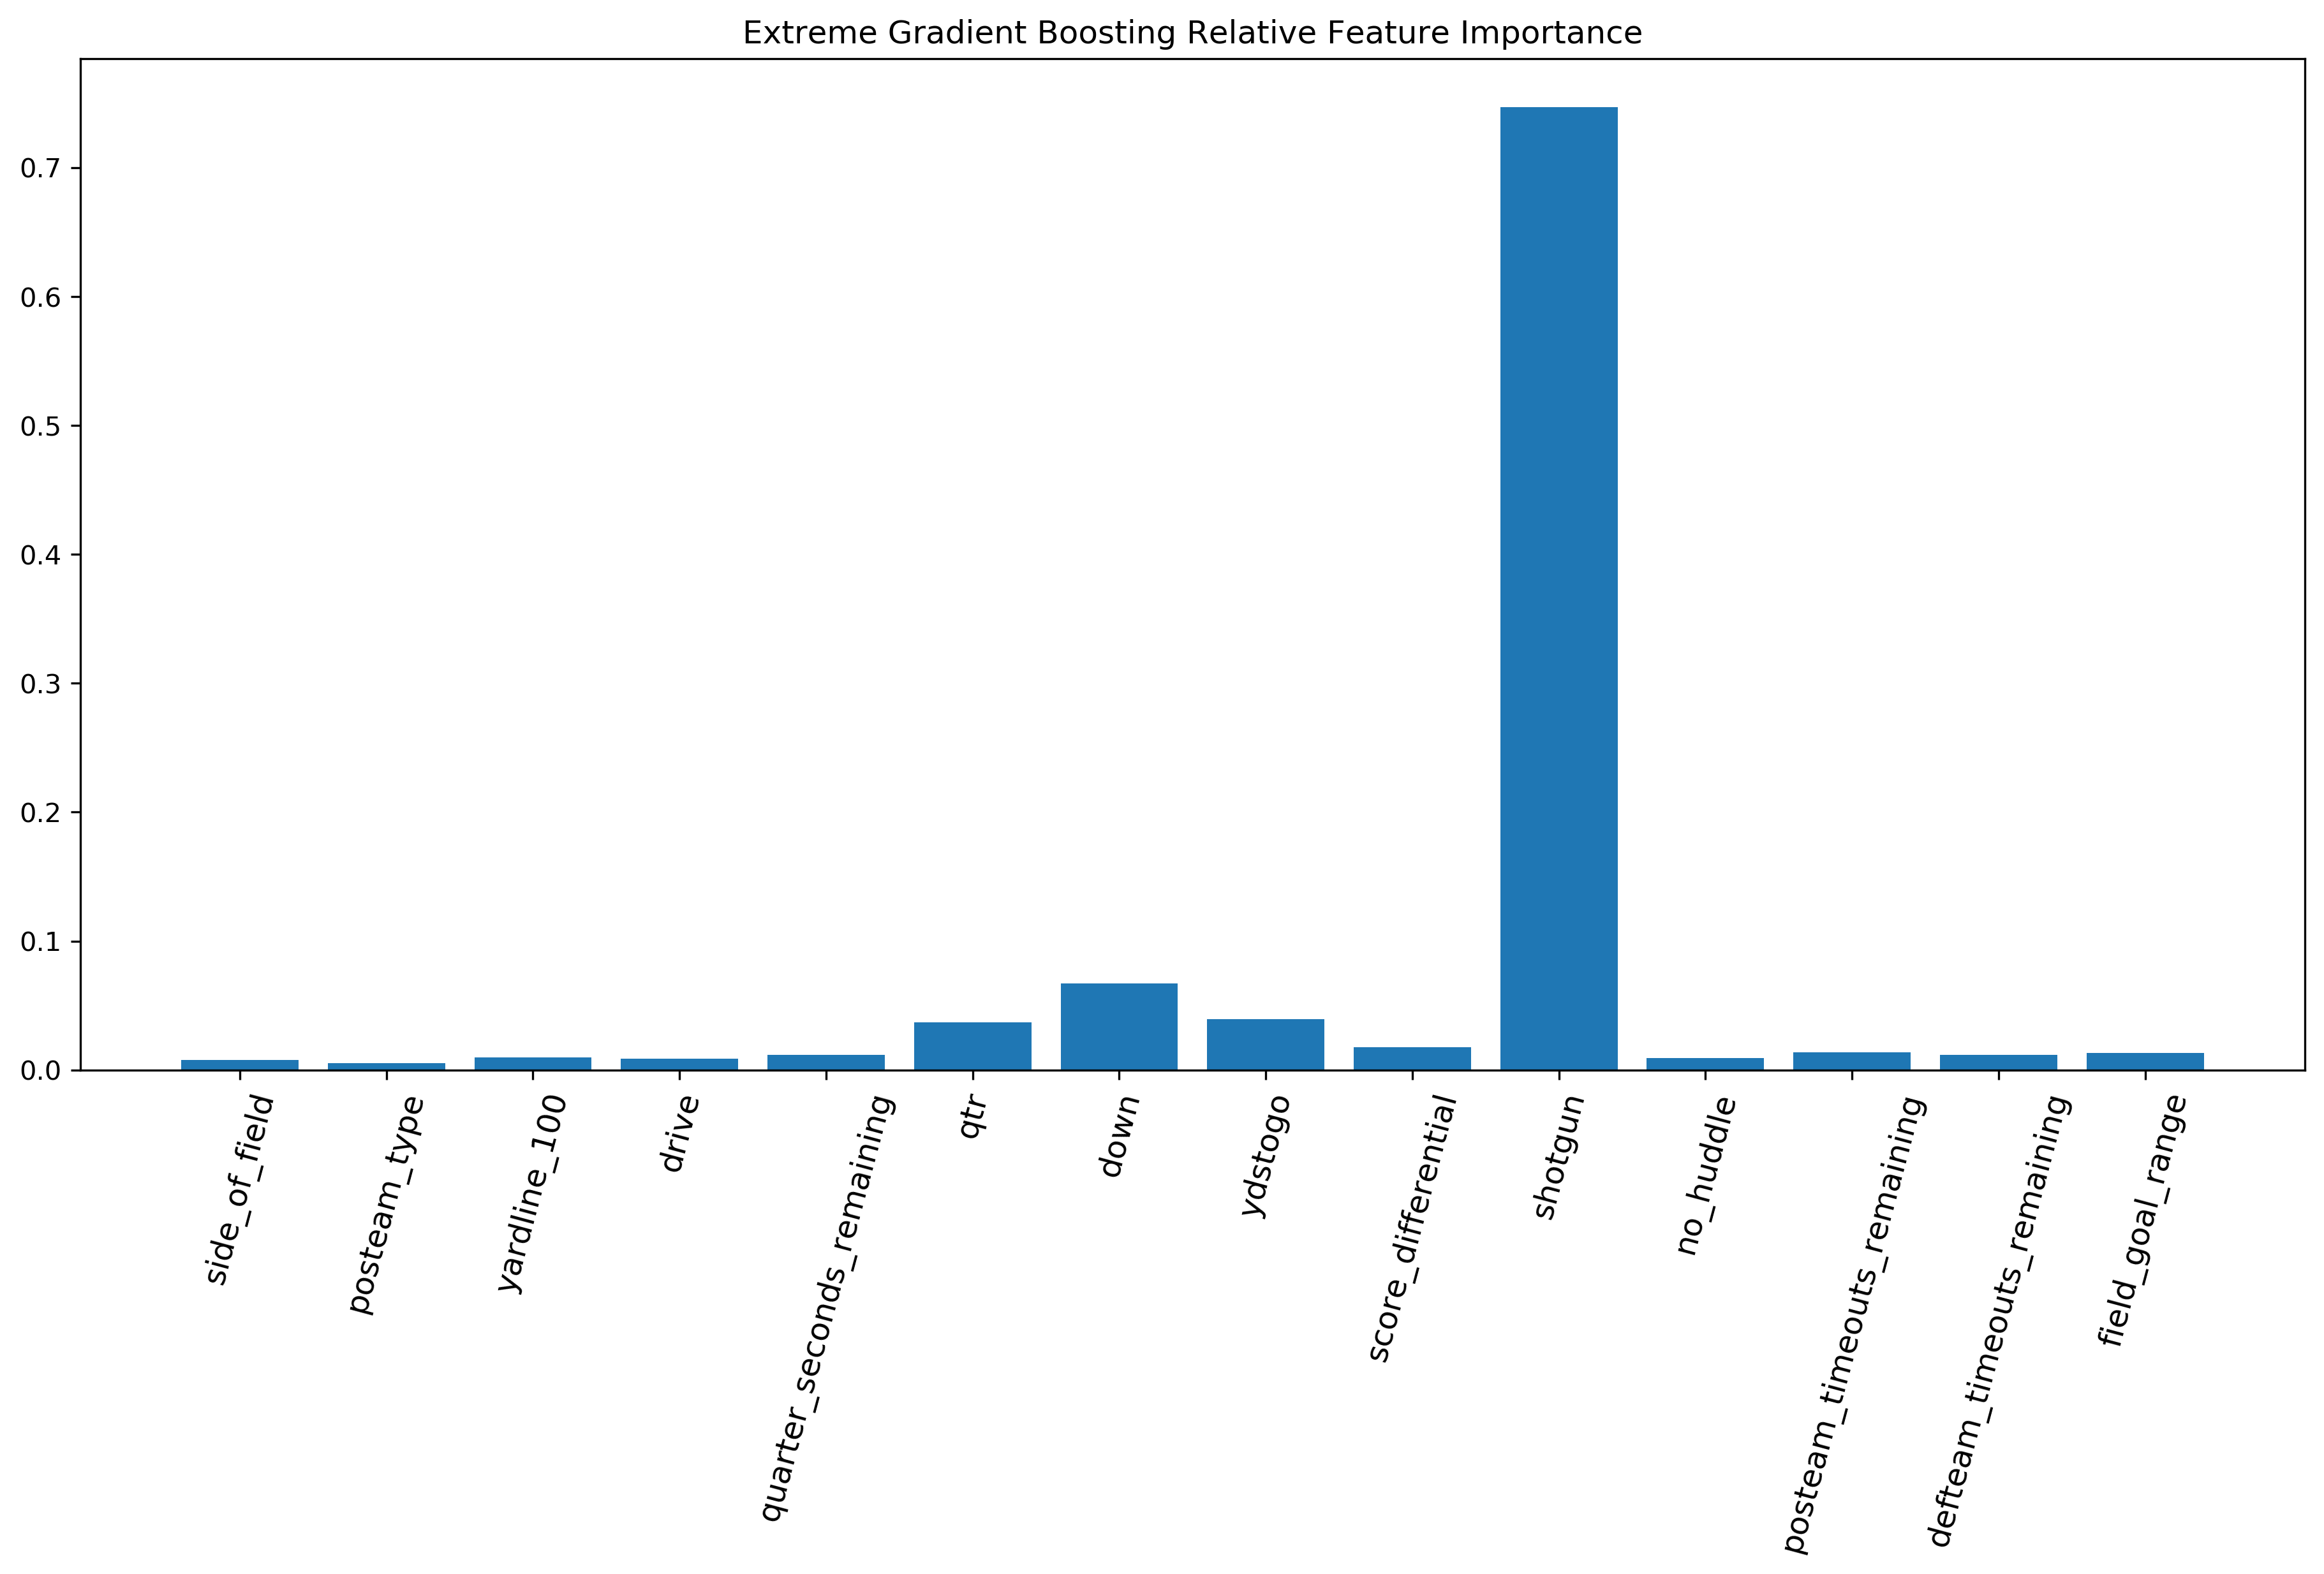

In [271]:
plt.figure(figsize=(15,7))
plt.bar(df_features['Feature Names'], df_features['Feature Importance'])
plt.title('Extreme Gradient Boosting Relative Feature Importance')
plt.xticks(rotation=75, fontsize=12)
plt.show()

In [251]:
print('Percentage of plays starting in shotgun formation during 2018 season was', df_2018['shotgun'].mean().round(2))
print('Percentage of plays starting in shotgun formation during 2019 season was', df_2019['shotgun'].mean().round(2))

Percentage of plays starting in shotgun formation during 2018 season was 0.64
Percentage of plays starting in shotgun formation during 2019 season was 0.65


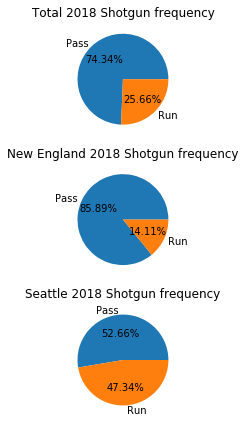

In [314]:
ne_shotgun_2018 = df_2018[(df_2018['posteam'] == 'NE') & df_2018['shotgun'] == 1]
ne_play_freq_2018 = ne_shotgun_2018['play_type'].value_counts()

sea_shotgun_2018 = df_2018[(df_2018['posteam'] == 'SEA') & df_2018['shotgun'] == 1]
sea_play_freq_2018 = sea_shotgun_2018['play_type'].value_counts()

df_shotgun_2018_total = df_2018[df_2018['shotgun'] == 1]
df_shotgun_2018_total = df_shotgun_2018_total['play_type'].value_counts()

plt.figure(figsize =(7,6
                    ))
plt.subplot(3,1,2)
plt.pie(ne_play_freq_2018, labels= ('Pass', 'Run'), autopct='%.2f%%')
plt.title('New England 2018 Shotgun frequency', fontsize=12)


plt.subplot(3,1,3)
plt.pie(sea_play_freq_2018, labels= ('Pass', 'Run'), autopct='%.2f%%')
plt.title('Seattle 2018 Shotgun frequency', fontsize=12)

plt.subplot(3,1,1)
plt.pie(df_shotgun_2018_total, labels= ('Pass', 'Run'), autopct='%.2f%%')
plt.title('Total 2018 Shotgun frequency', fontsize=12)


plt.tight_layout()
plt.show()
